### Thinking1
KNN与KMeans中的K分别代表什么？

答：KNN中的K是指找到离指定点最近的K个点，通过投票或求平均的方式来对指定点的某个属性进行预测，而KMeans中的K是指每次以离类中心最近的K个点作为一类，重新求类中心，直至类中心不再改变，从而得到最终的聚类结果。

### Thinking2
都有哪些常用的启发式算法？

答：常用的启发式算法有：  
**模拟退火算法：**  
在迭代更新可行解时，以一定概率接受一个比当前解要差的解，因此可以在面临局部最优时有可能跳出以进一步寻找全局最优  
**蚁群算法：**  
模拟蚂蚁寻找食物源的过程，即单个蚂蚁根据概率选择路径，而可以找到食物的路径上蚂蚁已经开始来回搬运，于是会有更高浓度的信息素，依据浓度可以吸引周围一定范围内的蚂蚁，最终信息素浓度最高的路径为最优路径  
**禁忌搜索算法：**  
对已经解得的局部最优解进行标记，在进一步的迭代中避开这些局部最优解，标记可在一定迭代次数后解除  
**还有遗传算法、人工神经网络等**

### Thinking3
遗传算法的原理是怎样的？

答：（1）设计一种编码方式，用来表示个体的染色体  
（2）随机初始化种群  
（3）利用适应性函数进行适应性评估，选择出适合交配的个体  
（4）根据一定的交配策略对合适交配的个体进行交配（交换编码的片段，产生新的编码）  
（5）新编码进行变异运算得到新的个体  
（6）用选择函数进行择优选择（每隔一段时间去掉一些适应性差的个体，保证总体数量持平）  

### Action1
基于能力描述的薪资预测：
数据集：抓取了4512个职位的能力描述，薪资  
Step1，数据加载  
Step2，可视化，使用Networkx  
Step3，提取文本特征 TFIDF  
Step4，回归分析，使用KNN回归，朴素贝叶斯回归，训练能力和薪资匹配模型  
Step5，基于指定的能力关键词，预测薪资

#### 数据加载

In [1]:
import pandas as pd
# 数据加载
file = 'jobs_4k.xls'
content = pd.read_excel(file)
print(content.columns)
content.head()

Index(['id', 'positionName', 'district', 'stationname', 'jobNature',
       'companyLabelList', 'industryField', 'salary', 'companySize',
       'skillLables', 'createTime', 'companyFullName', 'workYear', 'education',
       'positionAdvantage', 'url', 'detail', 'type'],
      dtype='object')


,id,positionName,district,stationname,jobNature,companyLabelList,industryField,salary,companySize,skillLables,createTime,companyFullName,workYear,education,positionAdvantage,url,detail,type
0,3,财务产品经理,海淀区,上地,全职,"['节日礼物', '年底双薪', '定期体检', '七险一金']","物流丨运输,软件开发",10k-15k,500-2000人,"['产品设计', '后台', 'B2B']",2020-05-15 15:10:02,北京福佑多多信息技术有限公司,1-3年,本科,福利待遇好、创业黑马、技术氛围好,https://www.lagou.com/jobs/7149613.html,岗位职责1、负责财务相关业务解决方案架构并主导与产品、技术等交付团队的对接，能够从完整的财务...,产品线
1,4,产品专家,海淀区,中关村,全职,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",企业服务,30k-50k,500-2000人,[],2020-05-16 08:23:06,北京拉勾网络技术有限公司,5-10年,本科,做好产品，给用户用,https://www.lagou.com/jobs/7056930.html,负责具体产品线的工作，完成用户价值。解决具体产品线的问题。产品线有策略、运营、基础产品流程等线,产品线
2,5,产品总监,海淀区,中关村,全职,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",企业服务,40k-75k,500-2000人,[],2020-05-16 08:23:06,北京拉勾网络技术有限公司,5-10年,本科,做好产品，给用户用,https://www.lagou.com/jobs/6982266.html,做出好产品，服务用户，实现用户价值。B端产品、C端产品、商业策略产品、运营产品等岗位，都有总...,产品线
3,6,联盟广告产品运营专家/专员-【商业化】,海淀区,东单,全职,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",文娱丨内容,20k-40k,2000人以上,['产品运营'],2020-05-15 19:35:13,北京达佳互联信息技术有限公司,5-10年,不限,扁平化管理 免费午餐晚餐下午茶,https://www.lagou.com/jobs/7112346.html,职位描述：1、负责快手联盟竞价广告的落地和运营，提升产品使用率和覆盖率； 2、深度分析广告预...,产品线
4,7,产品总监,海淀区,中关村,全职,"['领导好', '五险一金', '领军企业', '脑力密集型']","移动互联网,社交",20k-38k,15-50人,"['电商', '社交电商', '产品策划', '需求分析']",2020-05-16 09:15:16,北京领主科技有限公司,5-10年,本科,发展，创新,https://www.lagou.com/jobs/6864122.html,工作职责:1. 整体负责公司的产品功能规划、优化升级、实施工作； 2. 带领产品团队完成产品...,产品线


In [3]:
positions = content['positionName'].tolist()
skills = content['skillLables'].tolist()
skills[0],eval(skills[0])

("['产品设计', '后台', 'B2B']", ['产品设计', '后台', 'B2B'])

In [4]:
from collections import defaultdict
position_skill = defaultdict(list)
for p,s in zip(positions, skills):
    position_skill[p] += eval(s)
position_skill['产品专家']

['产品设计', '产品策划', '业务流程管理', '战略管理', '领导力', 'OKR管理', '产品设计']

#### 创建图，进行可视化

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

# 设置中文字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

G = nx.Graph(position_skill)
random_pr = nx.pagerank(G,alpha=0.9)
ranked_pr = sorted([(node, value) for node, value in random_pr.items()], key=lambda x: -x[1])
# 查看核心能力，核心职位
ranked_pr[:5]

[('后端', 0.026833573370768898),
 ('运维', 0.0191279829833669),
 ('Python', 0.01716937562136133),
 ('PHP', 0.015217301132452196),
 ('Java', 0.015099988114363864)]

In [44]:
# 随机取样20个工作岗位
import random
sample_positions = random.sample(positions, k=5)
sample_positions

['客户端测试专家', '交互设计师', 'PHP高级研发工程师', '大数据产品经理', '中高级Web前端工程师']

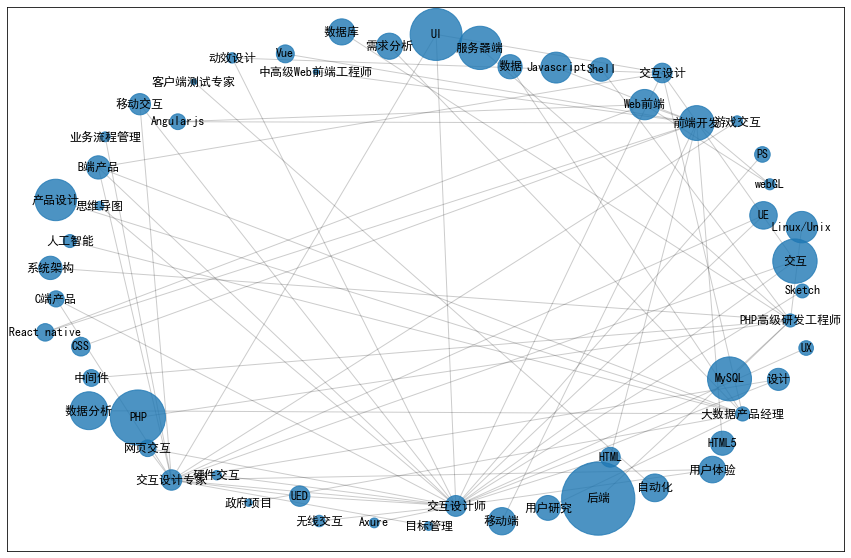

In [45]:
# 构建子图
sample_nodes = sample_positions
for p, skills in position_skill.items():
    if p in sample_positions:
        sample_nodes += skills
sample_graph = G.subgraph(sample_nodes)
nodesize = [random_pr[node]*200000 for node in sample_graph.nodes()]
plt.figure(figsize=(15,10))
pos = nx.spring_layout(sample_nodes,k=1)
# nx.draw(sample_graph, pos, with_labels=True, node_size=40, font_size=15)
# 以随机浏览得到的影响力作为节点大小，对子图进行呈现
nx.draw_networkx_nodes(sample_graph, pos, node_size=nodesize, alpha=0.8) # alpha为透明度
nx.draw_networkx_edges(sample_graph, pos, alpha=0.2)
nx.draw_networkx_labels(sample_graph, pos)
plt.show()

#### 数据处理

In [2]:
# 工作信息
X_content = content.drop(['salary', 'id', 'createTime', 'url'], axis=1)
# 训练目标
target = content['salary'].tolist()

##### 汇总描述并分词

In [3]:
import jieba
import re

# 将工作信息转化为一行的字符串描述
X_content['merged'] = X_content.apply(lambda x: str(x), axis=1)
X_string = X_content['merged'].tolist()
X_string[0]

"positionName                                                    财务产品经理\ndistrict                                                           海淀区\nstationname                                                         上地\njobNature                                                           全职\ncompanyLabelList                      ['节日礼物', '年底双薪', '定期体检', '七险一金']\nindustryField                                               物流丨运输,软件开发\ncompanySize                                                  500-2000人\nskillLables                                      ['产品设计', '后台', 'B2B']\ncompanyFullName                                         北京福佑多多信息技术有限公司\nworkYear                                                          1-3年\neducation                                                           本科\npositionAdvantage                                     福利待遇好、创业黑马、技术氛围好\ndetail               岗位职责1、负责财务相关业务解决方案架构并主导与产品、技术等交付团队的对接，能够从完整的财务...\ntype                                                           

In [12]:
def get_desc_string(x_string):
    job_desc = ''
    for i, element in enumerate(x_string.split('\n')[:-1]):
        if len(element.split()) >= 2:
            desc_list = element.split()[1:]
            for desc in desc_list:
                job_desc += desc
    return job_desc

def token(string):
    return re.findall('\w+', string) # 返回符合条件的字符串列表     

In [23]:
cutted_X = []
for row in X_string:
    job_string = get_desc_string(row)
    token_list = token(job_string)
    to_cut = ''.join(token_list)
    cutted = list(jieba.cut(to_cut))
    cutted_X.append(' '.join(cutted))

In [24]:
cutted_X[0]

'财务 产品 经理 海淀区 上 地 全职 节日 礼物 年底 双薪 定期 体检 七险 一金 物流 丨 运输 软件开发 5002000 人 产品设计 后台 B2B 北京 福佑 多多 信息技术 有限公司 13 年 本科 福利待遇 好 创业 黑马 技术 氛围 好 岗位职责 1 负责 财务 相关 业务 解决方案 架构 并 主导 与 产品 技术 等 交付 团队 的 对接 能够 从 完整 的 财务 产品线'

##### 生成词向量

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cutted_X)
print(len(cutted_X))
X.shape

4511


(4511, 7126)

##### 将目标转化为数值类型（采用平均值）

In [50]:
target[:10]

['10k-15k',
 '30k-50k',
 '40k-75k',
 '20k-40k',
 '20k-38k',
 '30k-50k',
 '40k-60k',
 '30k-50k',
 '40k-70k',
 '30k-50k']

In [49]:
import numpy as np
target_numerical = [np.mean(list(map(float, re.findall('\d+', t)))) for t in target]
target_numerical[:10]

[12.5, 40.0, 57.5, 30.0, 29.0, 40.0, 50.0, 40.0, 55.0, 40.0]

In [58]:
Y = target_numerical

#### 模型训练

In [97]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X, Y)

KNeighborsRegressor(n_neighbors=2)

In [90]:
# 朴素贝叶斯
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X.toarray(), np.array(Y).astype('int'))

GaussianNB()

In [107]:
# 预测
def predict_by_desc(test_string, model):
    test_words = [i for i in jieba.cut(test) if i.strip()]
    test_vec = vectorizer.transform([' '.join(test_words)])
    y_pred = model.predict(test_vec.toarray())
    return y_pred[0]

In [108]:
test_list = ['测试 北京 3年 专科',
        '测试 北京 4年 专科',
        '算法 北京 4年 本科',
        'UI 北京 4年 本科',
        "广州Java本科3年掌握大数据",
        "沈阳Java硕士3年掌握大数据", 
        "沈阳Java本科3年掌握大数据", 
        "北京算法硕士3年掌握图像识别"
       ]

print('KNN')
for test in test_list:
    print('{} 预测薪资为 {}'.format(test, predict_by_desc(test, knn)))
    
print('\n高斯朴素贝叶斯')
for test in test_list:
    print('{} 预测薪资为 {}'.format(test, predict_by_desc(test, nb)))

KNN
测试 北京 3年 专科 预测薪资为 14.5
测试 北京 4年 专科 预测薪资为 14.5
算法 北京 4年 本科 预测薪资为 28.0
UI 北京 4年 本科 预测薪资为 17.5
广州Java本科3年掌握大数据 预测薪资为 22.75
沈阳Java硕士3年掌握大数据 预测薪资为 22.75
沈阳Java本科3年掌握大数据 预测薪资为 22.75
北京算法硕士3年掌握图像识别 预测薪资为 19.25

高斯朴素贝叶斯
测试 北京 3年 专科 预测薪资为 6
测试 北京 4年 专科 预测薪资为 6
算法 北京 4年 本科 预测薪资为 2
UI 北京 4年 本科 预测薪资为 2
广州Java本科3年掌握大数据 预测薪资为 32
沈阳Java硕士3年掌握大数据 预测薪资为 32
沈阳Java本科3年掌握大数据 预测薪资为 23
北京算法硕士3年掌握图像识别 预测薪资为 32
